
<h1> Concevoir un application de sante publique - Exploration</h1>

* [1. Chargement des donnees et des modules](#10)
    * [1.1 Chargement des Modules](#11)
    * [1.2 Chargement des donnees](#12)
    * [1.3 Conversion des dates au format datetime](#13)
* [2. Exploration Monovariee](#20)
    * [2.1 Style du Texte et des Graphiques](#21)
    * [2.2 Repartition du Nutriscore](#22)
    * [2.3 Distribution de nutriscore (numerique)](#23)
    * [2.4 Hypotheses Statistique](#24)
    * [2.5 Distribution de l'énergie](#25)
    * [2.6 Distribution des Matières Grasses](#26)
    * [2.7 Distribution des Protéines](#27)
    * [2.8 Distribution des Glucides](#28)
    * [2.9 Distribution des graisses saturés](#29)
    * [2.10 Distribution du taux de Sucre](#210)
* [3. Exploration Multivariee](#30)
    * [3.1 Taux de protéines et énergie](#31)
    * [3.2 Taux de matières grasses et énergie](#32)
    * [3.3 Taux de glucides et énergie](#33)
    * [3.4 Nutriscore et Graisses Saturées](#34)
    * [3.5 Nutriscore et Sucres](#35)
    * [3.6 Nutriscore et protéines](#36)
    * [3.7 Taux de Sucres par nutriscore](#37)
    * [3.8 Taux de matières grasses par Nutriscore](#38)
    * [3.9 Energie pour chaque Nutriscore](#39)
    * [3.10 Matrice des corrélations](#310)
* [4. Analyse de Composants Principaux](#40)
    * [4.1 Décomposition](#41)
    * [4.2 Variance Expliquée](#42)
    * [4.3 Importance des colonnes dans chaque composant](#43)
    * [4.4 Cercle des Corélations](#44)

<h1>1. Chargements des donnees et des modules</h1><a class="anchor" id="10"></a>

<h2>1.1 Chargement des Modules</h2><a class="anchor" id="11"></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

import pingouin

C:\Users\petit\AppData\Local\Temp\ipykernel_17292\648244998.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<h2>1.2 Chargement des données</h2><a class="anchor" id="12"></a>

In [2]:
df = pd.read_csv('food_cleaned.csv')
df.head()

,url,created_datetime,last_modified_datetime,product_name,brands,countries_fr,ingredients_text,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,http://world-fr.openfoodfacts.org/produit/0018...,2017-03-01,2017-03-01,Deluxe Macaroni & Cheese Dinner,Big Y,États-Unis,"Enriched macaroni (wheat flour, niacin, reduce...",d,1351.0,10.10,3.54,44.44,3.03,2.0,12.12,2.10312,0.82800,14.0
1,http://world-fr.openfoodfacts.org/produit/0711...,2017-03-01,2017-03-01,Lemon Dijon Vinaigrette,Stonewall Kitchen,États-Unis,"Canola oil, lemon juice, white wine vinegar, d...",d,2092.0,53.33,3.33,6.67,0.00,0.0,0.00,1.44018,0.56700,15.0
2,http://world-fr.openfoodfacts.org/produit/0688...,2017-03-01,2017-03-01,Bacon! Sweet Sriracha Meatloaf Topped With Bacon,Ahold,États-Unis,"Beef pork, chicken, ketchup, (tomato concentra...",d,854.0,9.73,3.10,11.50,6.19,0.9,15.93,1.61798,0.63700,12.0
3,http://world-fr.openfoodfacts.org/produit/8712...,2016-09-01,2017-03-01,Tomates Pelées,La Bio Idea,France,"Tomates, jus de tomates.",a,110.0,0.30,0.05,4.60,4.10,0.9,1.20,0.10000,0.03937,-6.0
4,http://world-fr.openfoodfacts.org/produit/0011...,2017-03-01,2017-03-01,Creamy Peanut Butter,Simple Truth Organic,États-Unis,"Organic peanuts, sea salt.",d,2615.0,53.12,7.81,18.75,3.12,6.2,25.00,0.95250,0.37500,13.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98973 entries, 0 to 98972
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      98973 non-null  object 
 1   created_datetime         98973 non-null  object 
 2   last_modified_datetime   98973 non-null  object 
 3   product_name             98973 non-null  object 
 4   brands                   98973 non-null  object 
 5   countries_fr             98973 non-null  object 
 6   ingredients_text         98973 non-null  object 
 7   nutrition_grade_fr       98973 non-null  object 
 8   energy_100g              98973 non-null  float64
 9   fat_100g                 98973 non-null  float64
 10  saturated-fat_100g       98973 non-null  float64
 11  carbohydrates_100g       98973 non-null  float64
 12  sugars_100g              98973 non-null  float64
 13  fiber_100g               98973 non-null  float64
 14  proteins_100g         

<h2>1.3 Conversion des dates au format datetime</h2><a class="anchor" id="13"></a>

In [4]:
df['created_datetime'] = df.created_datetime.str[:7]

In [5]:
df['created_datetime'] = pd.to_datetime(df['created_datetime'])

<h1>2. Exploration Monovariée</h1><a class="anchor" id="20"></a>

Afin de mieux observer la distribution, nous allons utiliser un histogram pour avoir une bonne appréciation de celle-ci, et un box plot pour regarder plus en détail la médiane et les autres statistiques de la distribution

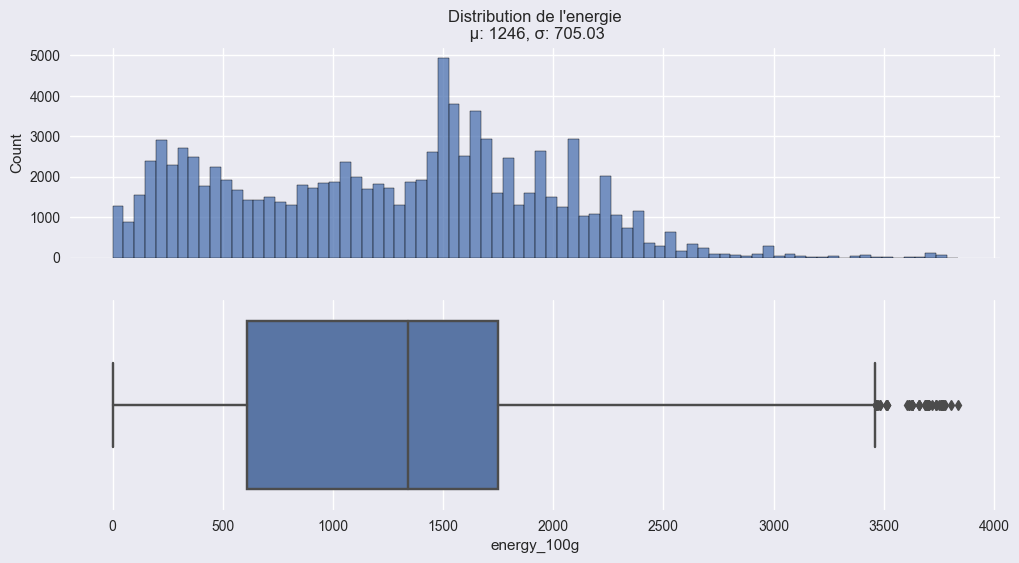

In [6]:
def hist_and_box(data, col:str, title:str):
    fig, ax = plt.subplots(2,1, figsize=(12,6), facecolor="#eaeaf2", sharex=True)
    
    mean = data[col].mean()
    std = data[col].std()
    
    sns.histplot(data=data, x=col, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])
    
    ax[0].set_title(title + f"\n μ: {round(mean)}, σ: {round(std,2)}")
    
    plt.show()

hist_and_box(df, "energy_100g", "Distribution de l'energie")

<h2>2.1 Style du Texte et des Graphiques</h2><a class="anchor" id="21"></a>

In [7]:
bold_text = {"font": "serif", "size": 20, "weight": "bold"}
normal_text = {"font": "serif", "size": 12, "weight": "normal"}

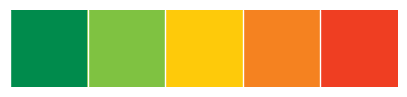

In [8]:
palette_nutriscore = ["#008b4c", "#7fc241", "#feca0a", "#f58220", "#ef3e22"]
sns.palplot(palette_nutriscore)

<h2>2.2 Repartition du Nutriscore</h2><a class="anchor" id="22"></a>

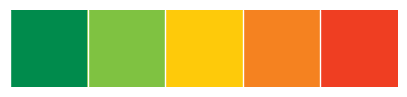

In [9]:
palette_nutriscore = ["#008b4c", "#7fc241", "#feca0a", "#f58220", "#ef3e22"]
sns.palplot(palette_nutriscore)

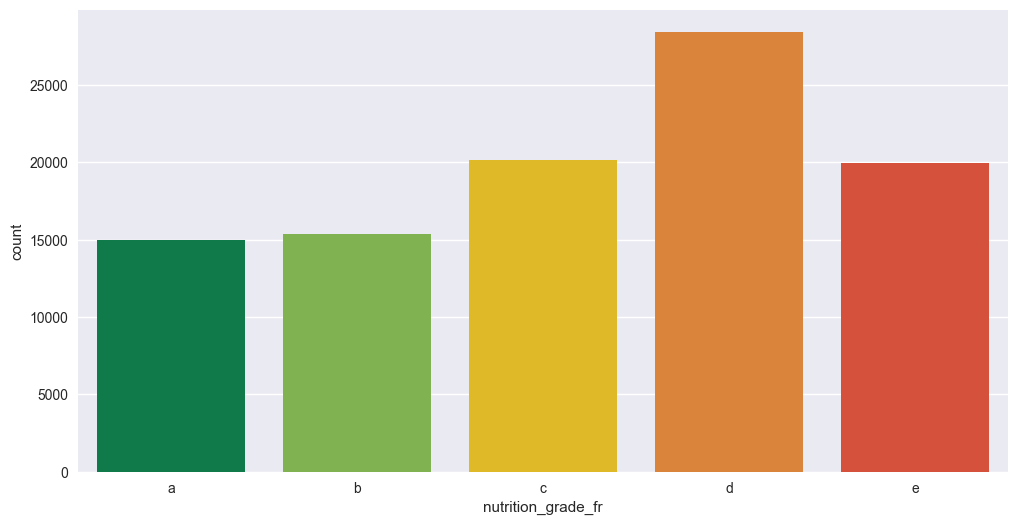

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='nutrition_grade_fr', order=['a', 'b', 'c', 'd', 'e'], palette=palette_nutriscore)
plt.show()

<h2>2.3 Distribution de nutriscore (numerique)</h2><a class="anchor" id="23"></a>

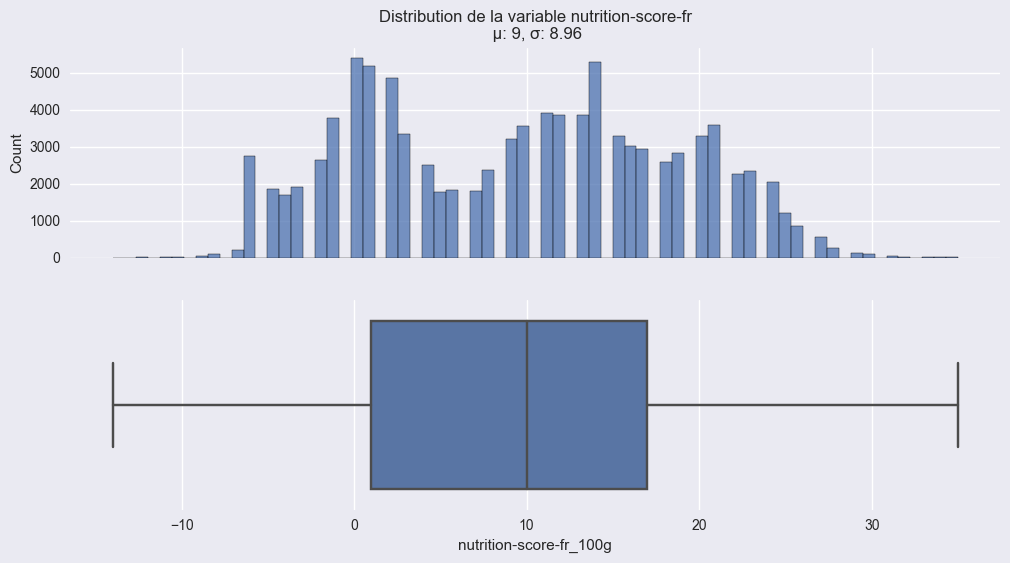

In [11]:
hist_and_box(df, 'nutrition-score-fr_100g', 'Distribution de la variable nutrition-score-fr')

<h2>2.4 Hypotheses Statistiques</h2> <a class="anchor" id="24"></a>

Nous pouvons voir que la distribution  du nutrition score ne suit pas une loi normale mais nous allons le verifier avec des test statistiques.

Nous emettons l'hypothese suivante:

H0 : les valeurs de la variable 'nutrition-score-fr_100g' pour l'échantillon sont issus d'une population normalement distribuée.

H1 :  les valeurs de la variable 'nutrition-score-fr_100g' pour l'échantillon NE sont PAS issus d'une population normalement distribuée

In [12]:
from scipy.stats import shapiro, kstest

score, p = shapiro(df['nutrition-score-fr_100g'])

print(f'Le test de shapiro-wilke nous donne un score de {round(score,3)} avec une p-value de {p}')

Le test de shapiro-wilke nous donne un score de 0.966 avec une p-value de 0.0


C:\Users\petit\anaconda3\envs\openclassroom\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Le test de Shapiro-Wilke n'est pas concluant a cause du trop grand nombre de valeurs

In [13]:
score, p = kstest(df['nutrition-score-fr_100g'], cdf='norm')

print(f'Le test de kolmogorov-smirnov nous donne un score de {round(score,3)} avec une p-value de {p}')

Le test de kolmogorov-smirnov nous donne un score de 0.719 avec une p-value de 0.0


Il y a suffisament de difference avec une distribution normale pour rejeter l'hypothese nulle.

<h2>2.5 Distribution de l'énergie</h2><a class="anchor" id="25"></a>

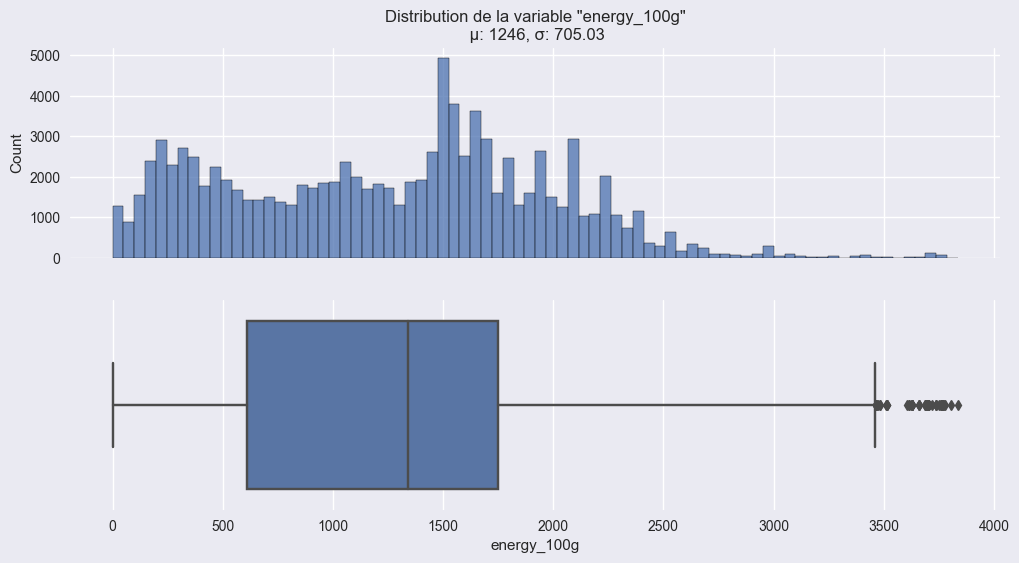

In [14]:
hist_and_box(df, 'energy_100g', 'Distribution de la variable "energy_100g"')

<h2>2.6 Distribution des Matières Grasses</h2><a class="anchor" id="26"></a>

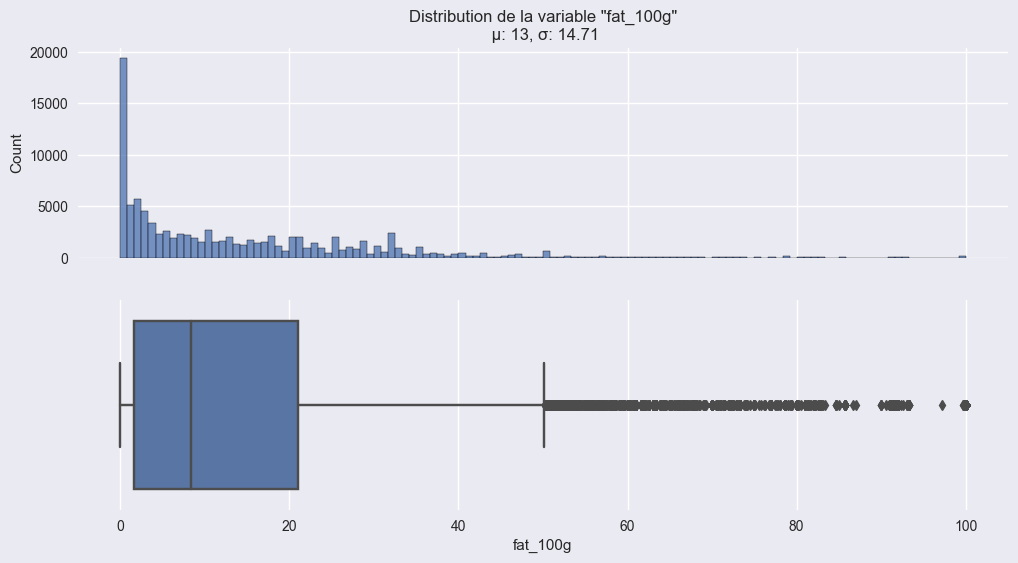

In [15]:
hist_and_box(df, 'fat_100g', 'Distribution de la variable "fat_100g"')

<h2>2.7 Distribution des Protéines</h2><a class="anchor" id="27"></a>

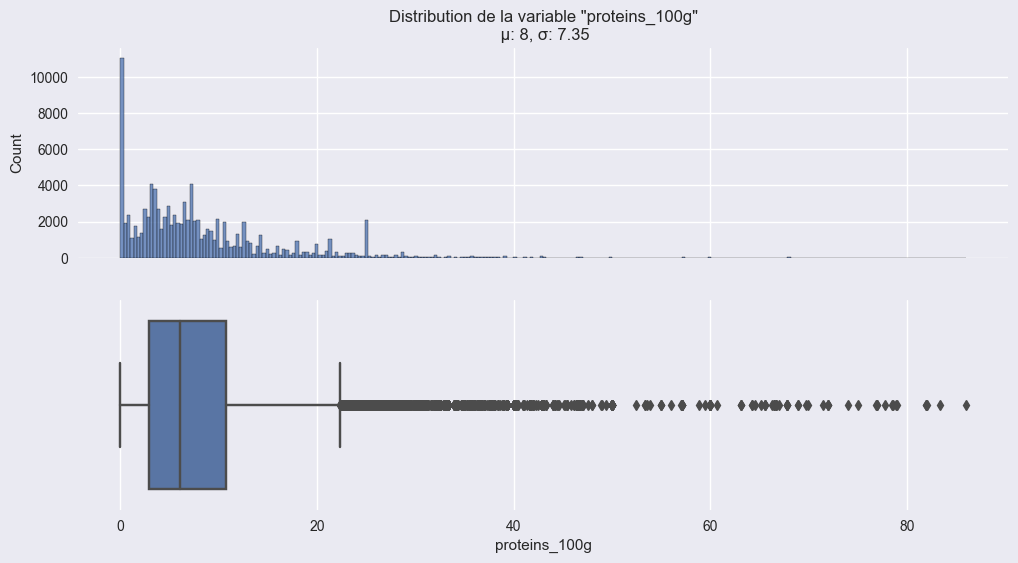

In [16]:
hist_and_box(df, 'proteins_100g', 'Distribution de la variable "proteins_100g"')

<h2>2.8 Distribution des Glucides</h2><a class="anchor" id="28"></a>

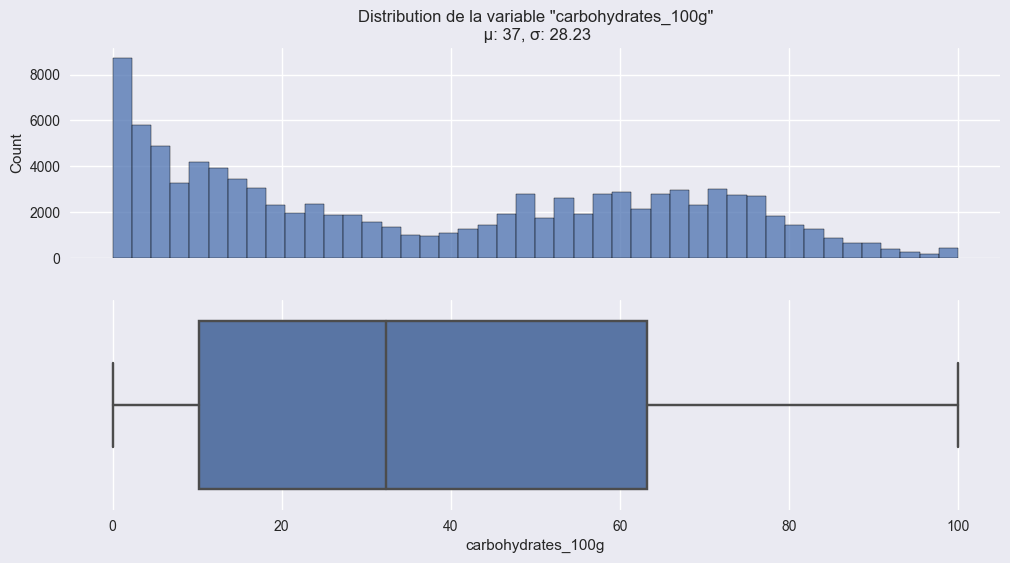

In [17]:
hist_and_box(df, 'carbohydrates_100g', 'Distribution de la variable "carbohydrates_100g"')

<h2>2.9 Distribution des graisses saturés</h2><a class="anchor" id="29"></a>

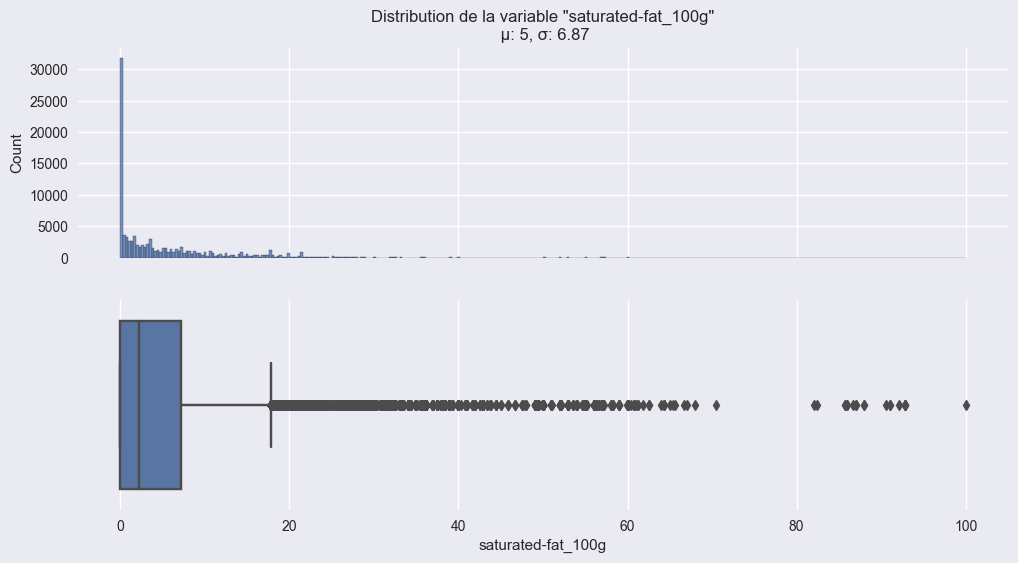

In [18]:
hist_and_box(df, 'saturated-fat_100g', 'Distribution de la variable "saturated-fat_100g"')

<h2>2.10 Distribution du taux de Sucre</h2><a class="anchor" id="210"></a>

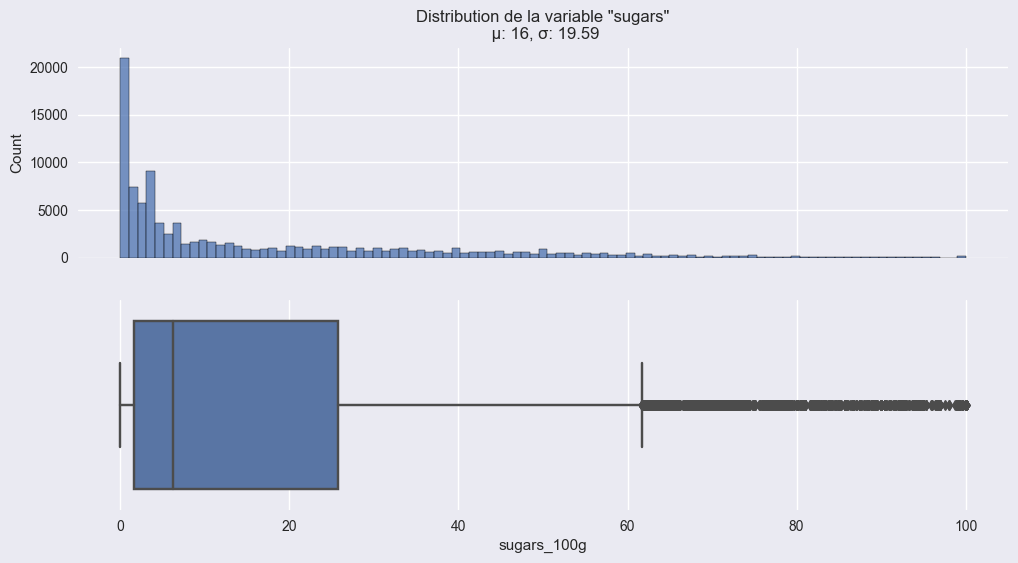

In [19]:
hist_and_box(df, 'sugars_100g', 'Distribution de la variable "sugars"')

<h1>3. Analyse Multivariable</h1><a class="anchor" id="30"></a>

<h2>3.1 Taux de protéines et énergie</h2><a class="anchor" id="31"></a>

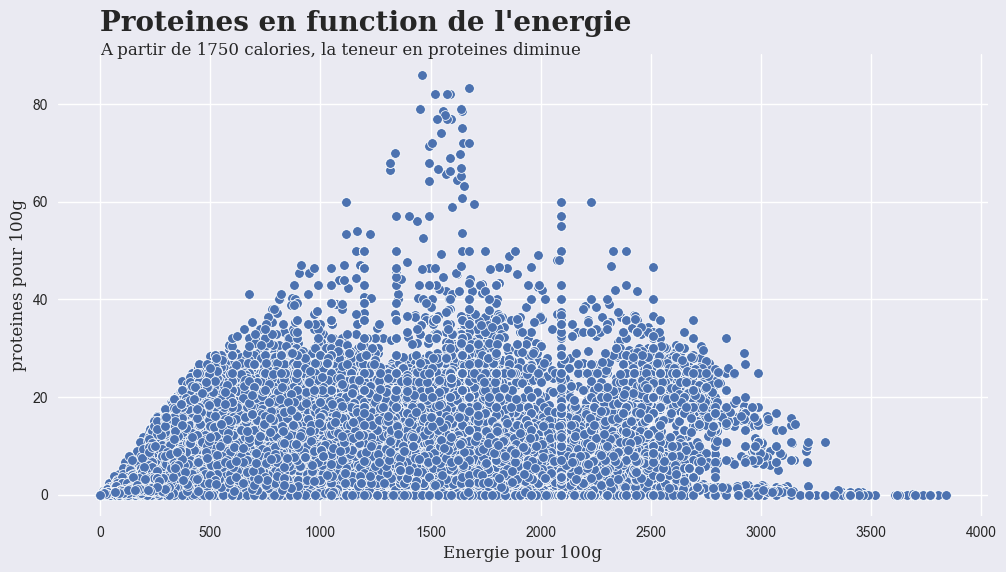

In [20]:
plt.figure(figsize=(12,6), facecolor="#eaeaf2")
sns.scatterplot(data=df, x='energy_100g', y='proteins_100g')
plt.text(0, 95, "Proteines en function de l'energie", bold_text)
plt.text(0, 90, "A partir de 1750 calories, la teneur en proteines diminue", normal_text)
plt.ylabel("proteines pour 100g", normal_text)
plt.xlabel("Energie pour 100g", normal_text)
plt.show()

<h2>3.2 Taux de matières grasses et énergie</h2><a class="anchor" id="32"></a>

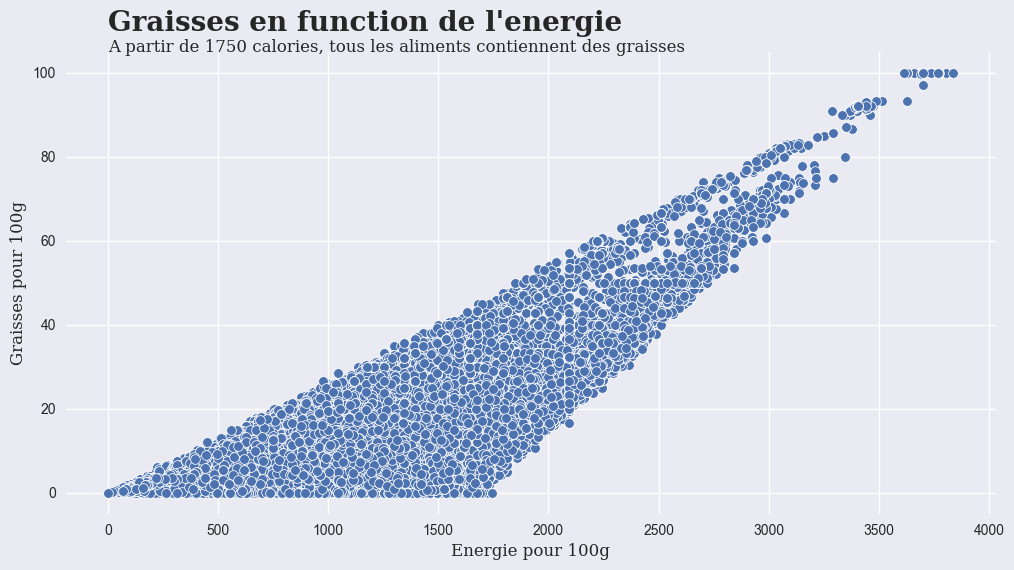

In [21]:
plt.figure(figsize=(12,6), facecolor="#eaeaf2")
sns.scatterplot(data=df, x='energy_100g', y='fat_100g')
plt.text(0, 110, "Graisses en function de l'energie", bold_text)
plt.text(0, 105, "A partir de 1750 calories, tous les aliments contiennent des graisses", normal_text)
plt.ylabel("Graisses pour 100g", normal_text)
plt.xlabel("Energie pour 100g", normal_text)
plt.show()

<h2>3.3 Taux de glucides et énergie</h2><a class="anchor" id="33"></a>

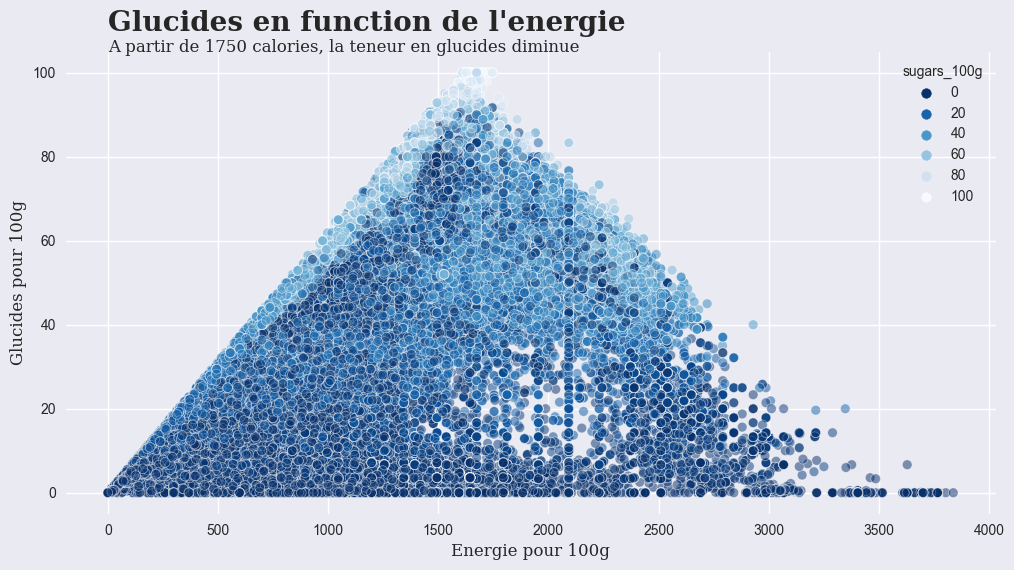

In [22]:
plt.figure(figsize=(12,6), facecolor="#eaeaf2")
sns.scatterplot(data=df, x='energy_100g', y='carbohydrates_100g', hue='sugars_100g', palette='Blues_r', alpha=0.5)
plt.text(0, 110, "Glucides en function de l'energie", bold_text)
plt.text(0, 105, "A partir de 1750 calories, la teneur en glucides diminue", normal_text)
plt.ylabel("Glucides pour 100g", normal_text)
plt.xlabel("Energie pour 100g", normal_text)
plt.show()

<h2>3.4 Nutriscore et Graisses Saturées</h2><a class="anchor" id="34"></a>

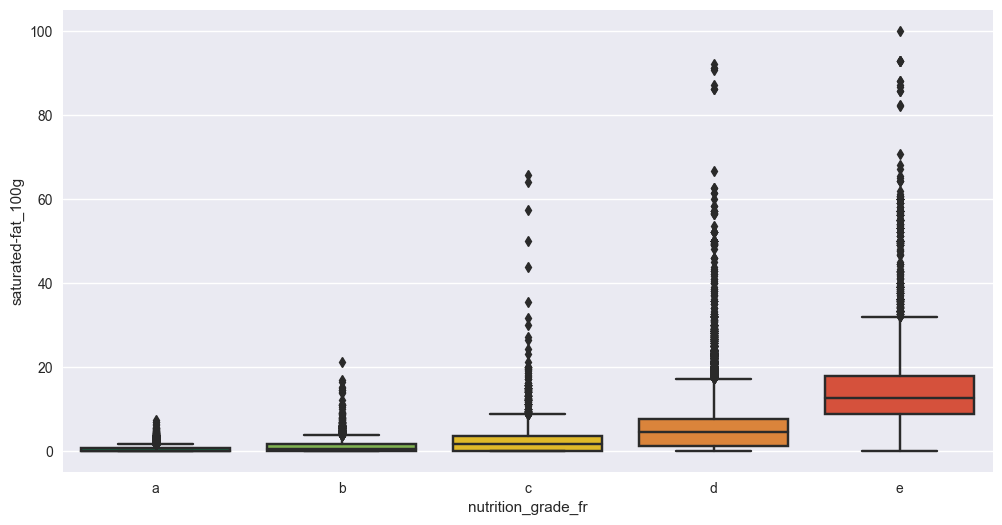

In [23]:
col = "saturated-fat_100g"

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='nutrition_grade_fr',
    y=col,
    order=['a', 'b', 'c', 'd', 'e'],
    palette=palette_nutriscore
)
plt.show()

In [24]:
pingouin.anova(
    data=df,
    dv=col,
    between="nutrition_grade_fr"
)

,Source,ddof1,ddof2,F,p-unc,np2
0,nutrition_grade_fr,4,98968,21883.779589,0.0,0.469349


La P-value étant très faible, nous pouvons rejeter l'hypothèse nulle (même moyenne de graisses pour chaque nutrition grades)

<h2>3.5 Nutriscore et Sucres</h2><a class="anchor" id="35"></a>

In [25]:
col = "sugars_100g"

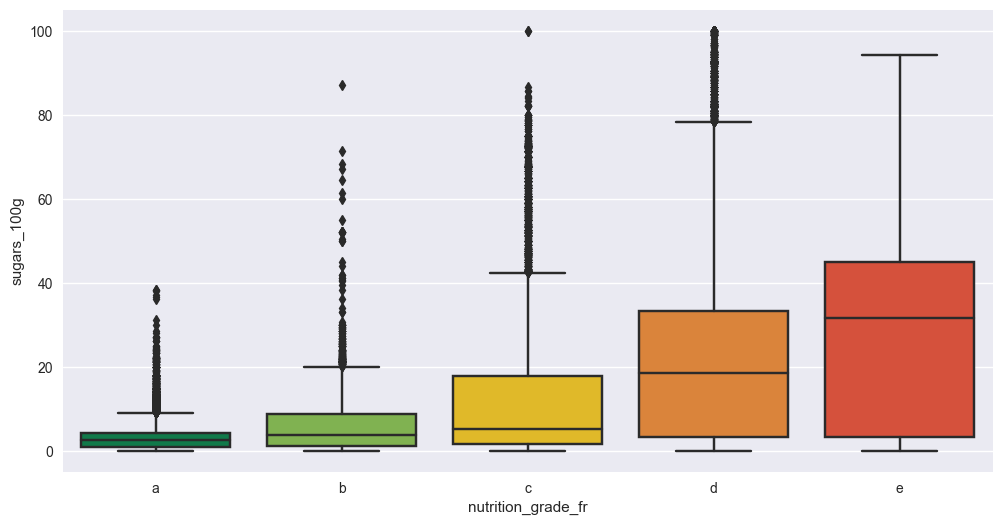

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='nutrition_grade_fr',
    y=col,
    order=['a', 'b', 'c', 'd', 'e'],
    palette=palette_nutriscore
)
plt.show()

In [27]:
pingouin.anova(
    data=df,
    dv=col,
    between="nutrition_grade_fr"
)

,Source,ddof1,ddof2,F,p-unc,np2
0,nutrition_grade_fr,4,98968,7033.142747,0.0,0.221341


La P-value étant très faible, nous pouvons rejeter l'hypothèse nulle (même moyenne de sucres pour chaque nutrition grades)

<h2>3.6 Nutriscore et protéines</h2><a class="anchor" id="36"></a>

In [28]:
col = "proteins_100g"

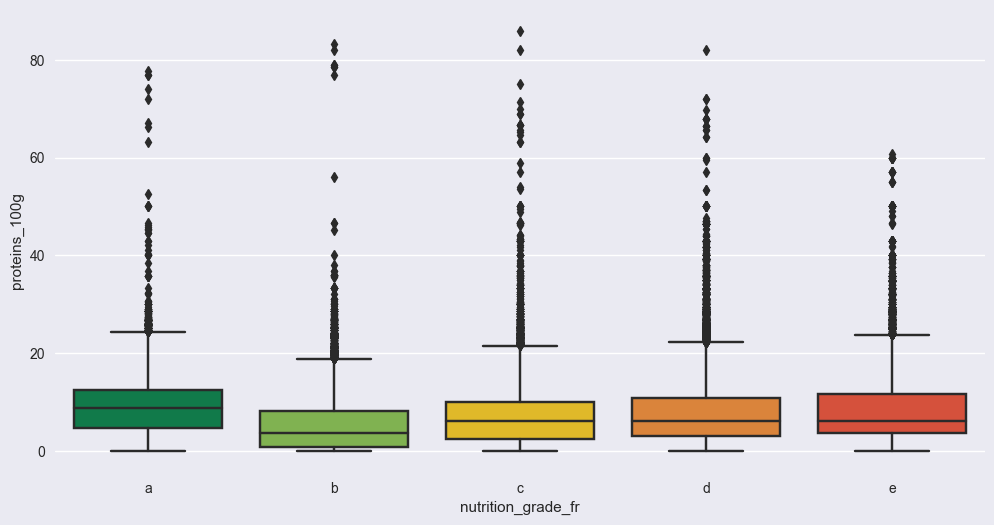

In [29]:
plt.figure(figsize=(12,6), facecolor="#eaeaf2")
sns.boxplot(
    data=df,
    x='nutrition_grade_fr',
    y=col,
    order=['a', 'b', 'c', 'd', 'e'],
    palette=palette_nutriscore
);

In [30]:
pingouin.anova(
    data=df,
    dv=col,
    between="nutrition_grade_fr"
)

,Source,ddof1,ddof2,F,p-unc,np2
0,nutrition_grade_fr,4,98968,741.373036,0.0,0.029092


In [31]:
pingouin.pairwise_tests(
    data=df,
    dv=col,
    between='nutrition_grade_fr',
    padjust="none"
)

C:\Users\petit\anaconda3\envs\openclassroom\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
C:\Users\petit\anaconda3\envs\openclassroom\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: overflow encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
C:\Users\petit\anaconda3\envs\openclassroom\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,nutrition_grade_fr,a,b,False,True,54.019352,30308.236635,two-sided,0.000000e+00,inf,0.620328
1,nutrition_grade_fr,a,c,False,True,31.166826,33963.589935,two-sided,2.775988e-210,1.18e+206,0.330676
2,nutrition_grade_fr,a,d,False,True,16.639274,37948.536969,two-sided,6.005001e-62,9.201e+57,0.154760
3,nutrition_grade_fr,a,e,False,True,1.577957,34824.281737,two-sided,1.145845e-01,0.042,0.016235
4,nutrition_grade_fr,b,c,False,True,-23.563233,34696.630870,two-sided,8.338396e-122,4.644e+117,-0.248331
5,nutrition_grade_fr,b,d,False,True,-38.611811,39119.424827,two-sided,0.000000e+00,inf,-0.356526
6,nutrition_grade_fr,b,e,False,True,-46.361901,35013.704021,two-sided,0.000000e+00,inf,-0.475209
7,nutrition_grade_fr,c,d,False,True,-15.025181,46992.854846,two-sided,6.596651e-51,8.128e+46,-0.134627
8,nutrition_grade_fr,c,e,False,True,-26.014305,37816.943239,two-sided,6.858490e-148,5.359e+143,-0.259881
9,nutrition_grade_fr,d,e,False,True,-13.112786,40619.894919,two-sided,3.342382e-39,1.893e+35,-0.122846


nous pouvons voir cette fois ci la significance des tests. La valeur p n'a pas pu être calculée pour trois de ses paires (Division By Zero).
La faible p-value nous indique que la différence entre la moyenne des protéines de chaque nutrition grades est significative

<h2>3.7 Taux de Sucres par nutriscore</h2><a class="anchor" id="37"></a>

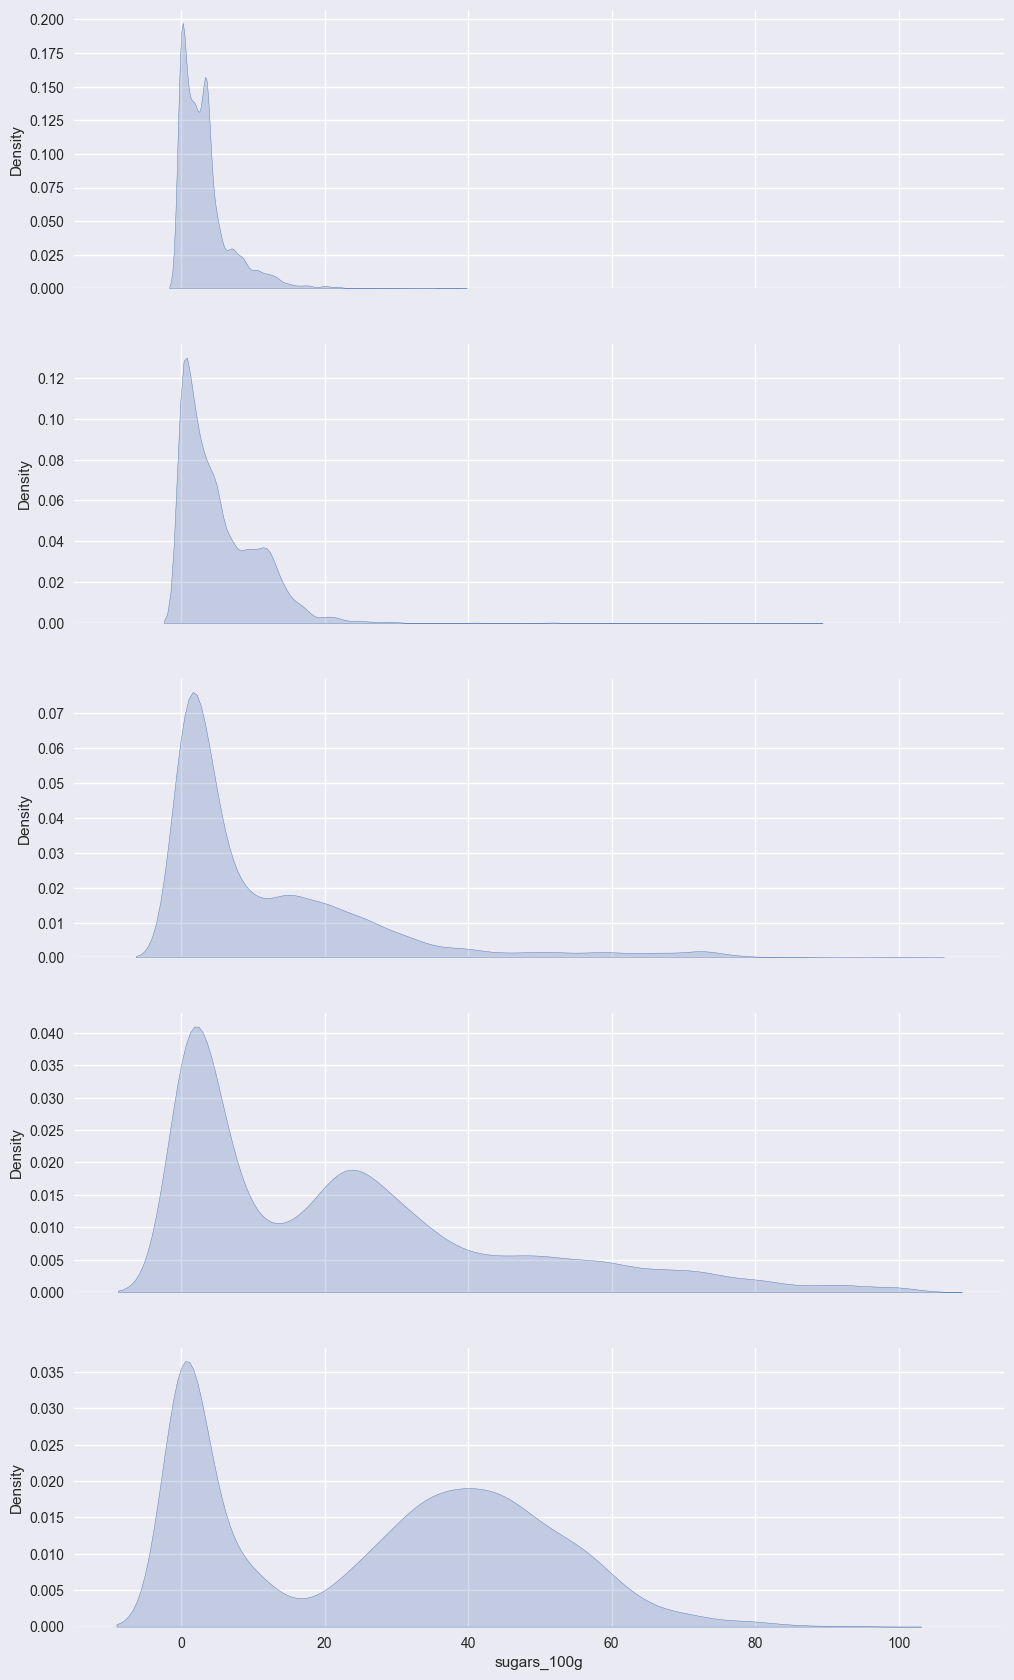

In [32]:
fig, ax = plt.subplots(5,1, figsize=(12,21), facecolor="#eaeaf2", sharex=True)

sns.kdeplot(ax=ax[0], data=df[df['nutrition_grade_fr'] == 'a'], x='sugars_100g', fill=True)
sns.kdeplot(ax=ax[1], data=df[df['nutrition_grade_fr'] == 'b'], x='sugars_100g', fill=True)
sns.kdeplot(ax=ax[2], data=df[df['nutrition_grade_fr'] == 'c'], x='sugars_100g', fill=True)
sns.kdeplot(ax=ax[3], data=df[df['nutrition_grade_fr'] == 'd'], x='sugars_100g', fill=True)
sns.kdeplot(ax=ax[4], data=df[df['nutrition_grade_fr'] == 'e'], x='sugars_100g', fill=True);

<h2>3.8 Taux de matières grasses par Nutriscore</h2><a class="anchor" id="38"></a>

C:\Users\petit\AppData\Local\Temp\ipykernel_17292\4113227005.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


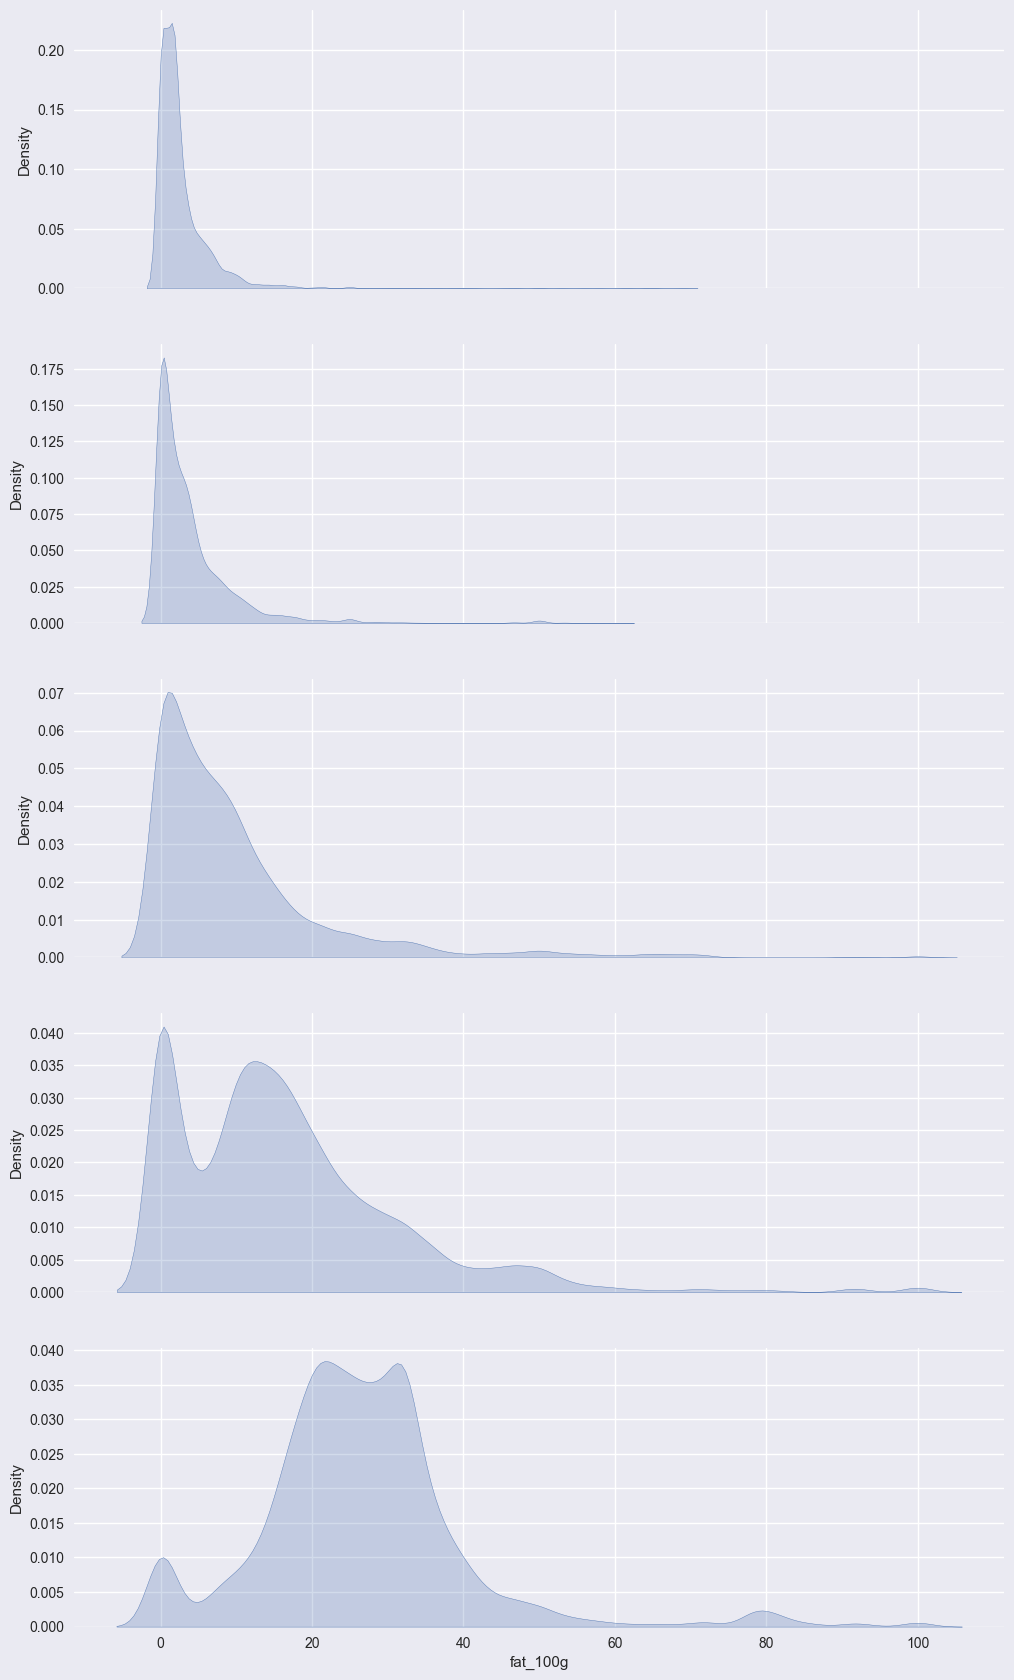

In [33]:
plt.style.use('seaborn')
fig, ax = plt.subplots(5,1, figsize=(12,21), facecolor="#eaeaf2", sharex=True)

sns.kdeplot(ax=ax[0], data=df[df['nutrition_grade_fr'] == 'a'], x='fat_100g', fill=True)
sns.kdeplot(ax=ax[1], data=df[df['nutrition_grade_fr'] == 'b'], x='fat_100g', fill=True)
sns.kdeplot(ax=ax[2], data=df[df['nutrition_grade_fr'] == 'c'], x='fat_100g', fill=True)
sns.kdeplot(ax=ax[3], data=df[df['nutrition_grade_fr'] == 'd'], x='fat_100g', fill=True)
sns.kdeplot(ax=ax[4], data=df[df['nutrition_grade_fr'] == 'e'], x='fat_100g', fill=True);

<h2>3.9 Energie pour chaque Nutriscore</h2><a class="anchor" id="39"></a>

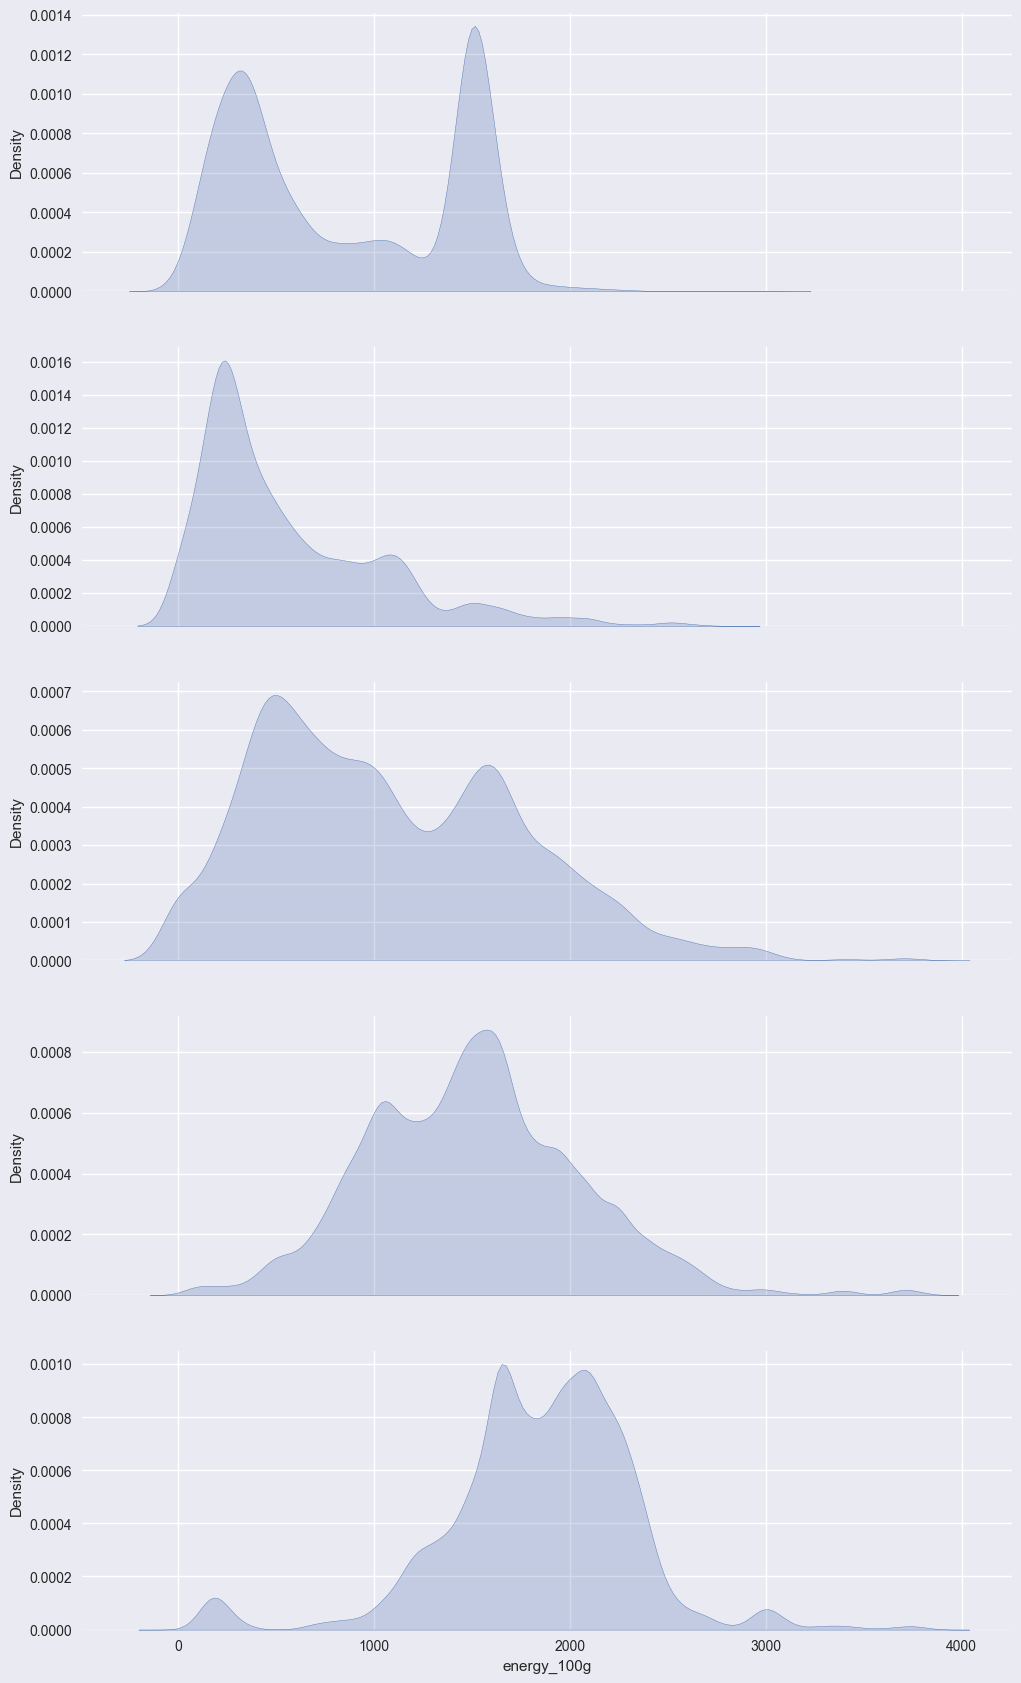

In [34]:
fig, ax = plt.subplots(5,1, figsize=(12,21), facecolor="#eaeaf2", sharex=True)

sns.kdeplot(ax=ax[0], data=df[df['nutrition_grade_fr'] == 'a'], x='energy_100g', fill=True)
sns.kdeplot(ax=ax[1], data=df[df['nutrition_grade_fr'] == 'b'], x='energy_100g', fill=True)
sns.kdeplot(ax=ax[2], data=df[df['nutrition_grade_fr'] == 'c'], x='energy_100g', fill=True)
sns.kdeplot(ax=ax[3], data=df[df['nutrition_grade_fr'] == 'd'], x='energy_100g', fill=True)
sns.kdeplot(ax=ax[4], data=df[df['nutrition_grade_fr'] == 'e'], x='energy_100g', fill=True);

L'energie par 100g semble augmenter avec en allant vers les lettres C, D, E, qui indique un produit moins bon pour la santé.
Toutefois certains produits sont classés A malgré un nombre important de calories.

<h2>3.10 Matrice de corrélation</h2><a class="anchor" id="310"></a>

Il existe plusieurs type de corrélations. Les deux plus courantes sont celle de pearson et de spearman. La corrélation de Pearson ne marche qu'avec les données corrélées linéarement. Pour les relations non-linéare, la corrélation de spearman est plus approprié

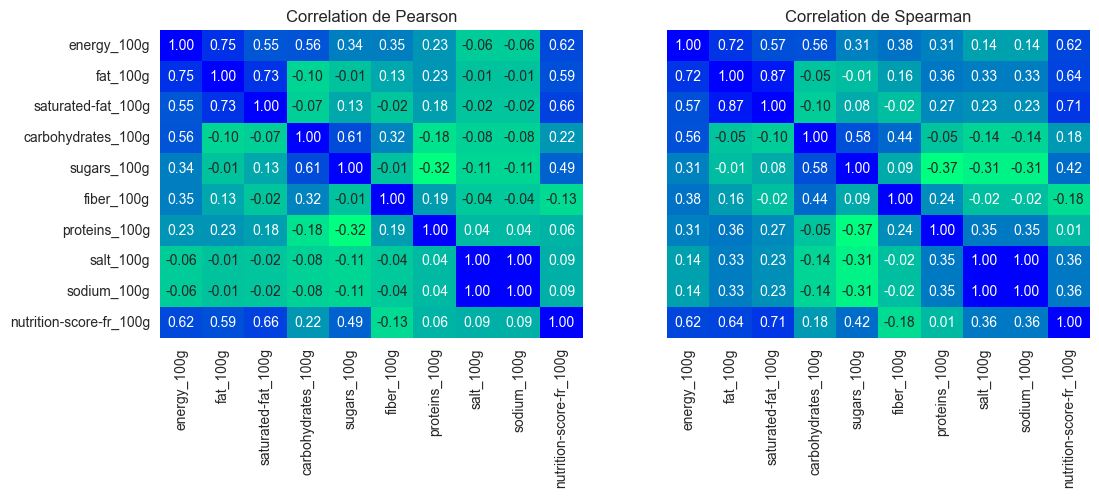

In [35]:
fig, ax = plt.subplots(1,2, figsize=(12,4), sharey=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='winter_r', cbar=None, fmt='.2f', ax=ax[0])
sns.heatmap(df.corr(method="spearman", numeric_only=True), annot=True, cmap='winter_r', cbar=None, fmt='.2f', ax=ax[1])
ax[0].set_title("Correlation de Pearson")
ax[1].set_title("Correlation de Spearman");

Nous pouvons voir de légères différences entre les corrélations de pearson et de spearman

Il semble y avoir une legère correlation entre le nutrition-score et les fibres. Plus de fibres indiquerait un aliment de meilleure qualité

<h2>3.11 Chi-square entre le nutrition grade et le pays</h2>

Nous allons limiter le nombre de pays à analyser et ne garder que les quatre plus courant pour notre test d'indépendance chi2

In [36]:
countries = ['États-Unis', 'France', 'Suisse', 'Allemagne']
top_countries = df[df['countries_fr'].isin(countries)].copy()

In [37]:
top_countries.groupby("countries_fr")['nutrition_grade_fr'].value_counts(normalize=True)

countries_fr  nutrition_grade_fr
Allemagne     d                     0.255991
              c                     0.227669
              e                     0.188453
              a                     0.185185
              b                     0.142702
France        d                     0.279461
              c                     0.237545
              e                     0.186253
              b                     0.151859
              a                     0.144882
Suisse        d                     0.296135
              c                     0.242953
              e                     0.191805
              b                     0.164196
              a                     0.104911
États-Unis    d                     0.289020
              e                     0.208704
              c                     0.192534
              b                     0.155766
              a                     0.153975
Name: nutrition_grade_fr, dtype: float64

In [38]:
top_countries.groupby("countries_fr")['nutrition_grade_fr'].value_counts()

countries_fr  nutrition_grade_fr
Allemagne     d                       235
              c                       209
              e                       173
              a                       170
              b                       131
France        d                      5127
              c                      4358
              e                      3417
              b                      2786
              a                      2658
Suisse        d                      1019
              c                       836
              e                       660
              b                       565
              a                       361
États-Unis    d                     21145
              e                     15269
              c                     14086
              b                     11396
              a                     11265
Name: nutrition_grade_fr, dtype: int64

En regroupant les nutritions grades par pays, nous pouvons voir que la qualité des produits disponible varie d'un pays à l'autre

In [39]:
_, _, stats = pingouin.chi2_independence(
    data=top_countries,
    x='nutrition_grade_fr',
    y='countries_fr',
    correction=False
)
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,294.036816,12.0,8.381371e-56,0.031975,1.0
1,cressie-read,0.666667,293.791844,12.0,9.434364e-56,0.031961,1.0
2,log-likelihood,0.000000,293.870313,12.0,9.083414e-56,0.031966,1.0
3,freeman-tukey,-0.500000,294.450800,12.0,6.862044e-56,0.031997,1.0
4,mod-log-likelihood,-1.000000,295.505982,12.0,4.121332e-56,0.032055,1.0
5,neyman,-2.000000,299.164244,12.0,7.033794e-57,0.032252,1.0


La faible p value pour le test de pearson suggère que les variables "nutrition_grade_fr" et "countries_fr" ne sont pas indépendantes

<h1>4. Analyse de Composants Principaux</h1><a class="anchor" id="40"></a>

<h2>4.1 Décomposition</h2><a class="anchor" id="41"></a>

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df1 = df[['energy_100g', 'proteins_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
           'fiber_100g', 'salt_100g', 'sodium_100g']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1)
pca = PCA(n_components=9)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)

[2.94798104e-01 2.34026962e-01 1.95251575e-01 1.35564412e-01
 7.10278599e-02 4.19324586e-02 2.73093253e-02 8.93023411e-05
 8.45482621e-10]


<h2>4.2 Variance Expliquée</h2><a class="anchor" id="42"></a>

In [41]:
exp_var = pca.explained_variance_ratio_
exp_var_sum = np.cumsum(exp_var)

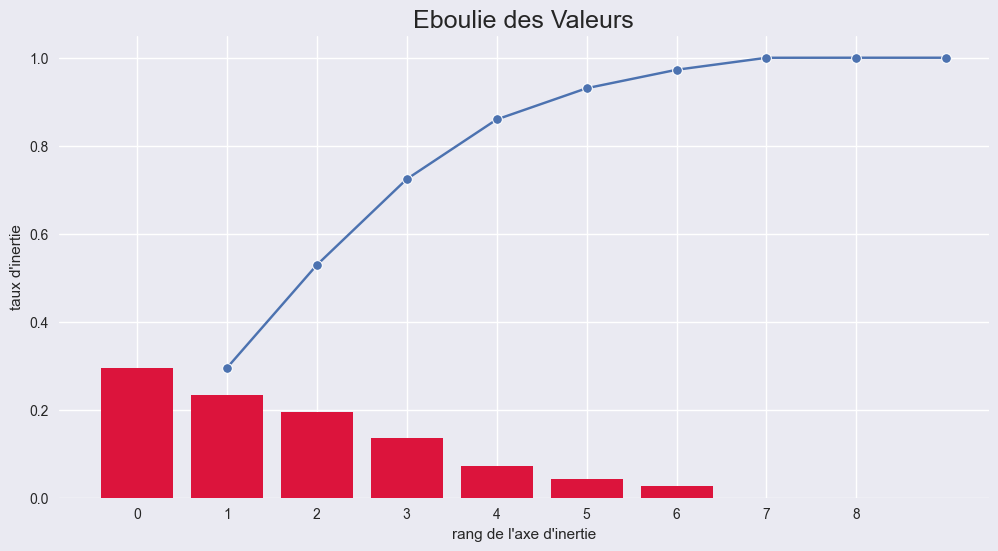

In [42]:
plt.figure(figsize=(12,6), facecolor="#eaeaf2")
plt.bar(range(0,9), exp_var, color='crimson')
sns.lineplot(x=range(1,10), y=exp_var_sum, marker='o')
plt.title("Eboulie des Valeurs", {"size": 18, "weight": "normal"})
plt.xticks([0,1,2,3,4,5,6,7,8])
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("taux d'inertie");

100% de la variance est expliquée au septième composant.

<h2>4.3 Importance des colonnes dans chaque composant</h2><a class="anchor" id="43"></a>

In [43]:
features = ['energy_100g', 'proteins_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
           'fiber_100g', 'salt_100g', 'sodium_100g']
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8
0,-5.796761e-01,-1.286022e-01,-4.685165e-01,-4.237552e-01,-2.868974e-01,-2.486741e-01,-2.297827e-01,0.160331,0.160331
1,8.501384e-02,2.942409e-01,3.032048e-01,2.529672e-01,-3.008873e-01,-3.036704e-01,-1.636783e-02,0.532566,0.532566
2,1.265162e-01,-2.876421e-01,-2.051158e-01,-1.819695e-01,5.001499e-01,4.270175e-01,1.171890e-01,0.435800,0.435800
3,6.191269e-02,4.682721e-01,-1.799349e-01,-3.655633e-01,1.793436e-01,-3.030509e-01,6.971118e-01,-0.021285,-0.021284
4,-6.981451e-02,-7.374359e-01,2.473118e-01,4.928783e-02,-1.988387e-01,-2.594096e-01,5.299412e-01,0.005197,0.005197
5,-3.804480e-01,1.780134e-01,-2.198044e-01,4.056944e-01,-3.509272e-01,5.663799e-01,4.077002e-01,0.016016,0.016016
6,-9.705906e-02,-7.085509e-02,-4.642520e-01,6.501320e-01,4.043411e-01,-4.285700e-01,-1.320935e-02,-0.003096,-0.003096
7,-6.912840e-01,1.197754e-01,5.376831e-01,8.730599e-04,4.676155e-01,-3.146064e-03,-1.489679e-03,-0.000004,-0.000002
8,-8.551699e-07,7.372126e-07,9.081209e-07,-1.237856e-08,9.347736e-07,-1.370165e-07,-2.446489e-07,0.707107,-0.707107


In [44]:
pcs.columns = features
pcs.index = ['PC' + str(i+1) for i in range(0,9)]
pcs

,energy_100g,proteins_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,salt_100g,sodium_100g
PC1,-5.796761e-01,-1.286022e-01,-4.685165e-01,-4.237552e-01,-2.868974e-01,-2.486741e-01,-2.297827e-01,0.160331,0.160331
PC2,8.501384e-02,2.942409e-01,3.032048e-01,2.529672e-01,-3.008873e-01,-3.036704e-01,-1.636783e-02,0.532566,0.532566
PC3,1.265162e-01,-2.876421e-01,-2.051158e-01,-1.819695e-01,5.001499e-01,4.270175e-01,1.171890e-01,0.435800,0.435800
PC4,6.191269e-02,4.682721e-01,-1.799349e-01,-3.655633e-01,1.793436e-01,-3.030509e-01,6.971118e-01,-0.021285,-0.021284
PC5,-6.981451e-02,-7.374359e-01,2.473118e-01,4.928783e-02,-1.988387e-01,-2.594096e-01,5.299412e-01,0.005197,0.005197
PC6,-3.804480e-01,1.780134e-01,-2.198044e-01,4.056944e-01,-3.509272e-01,5.663799e-01,4.077002e-01,0.016016,0.016016
PC7,-9.705906e-02,-7.085509e-02,-4.642520e-01,6.501320e-01,4.043411e-01,-4.285700e-01,-1.320935e-02,-0.003096,-0.003096
PC8,-6.912840e-01,1.197754e-01,5.376831e-01,8.730599e-04,4.676155e-01,-3.146064e-03,-1.489679e-03,-0.000004,-0.000002
PC9,-8.551699e-07,7.372126e-07,9.081209e-07,-1.237856e-08,9.347736e-07,-1.370165e-07,-2.446489e-07,0.707107,-0.707107


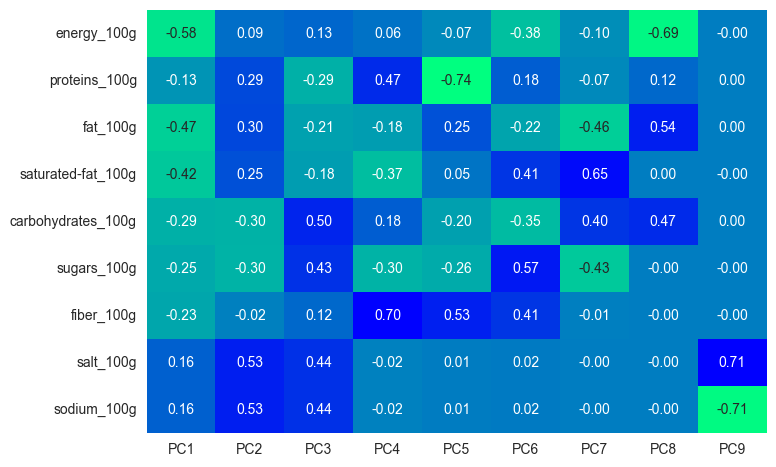

In [45]:
sns.heatmap(pcs.T, annot=True, cbar=None, cmap='winter_r', fmt='.2f');

<h2>4.4 Cercle des Corélations</h2><a class="anchor" id="44"></a>

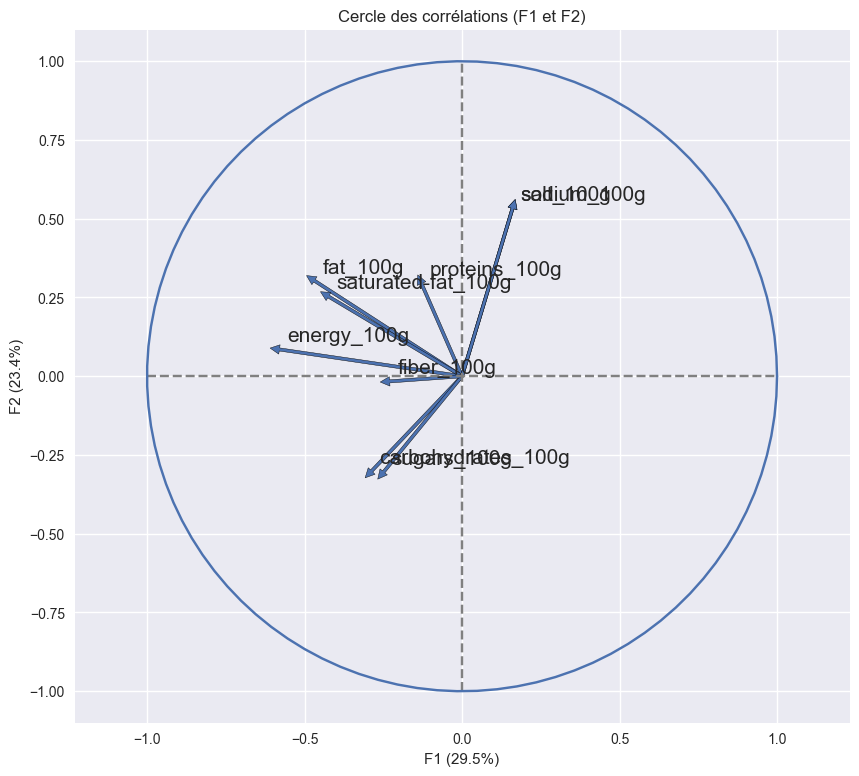

In [46]:
#code fourni par OpenClassrooms dans le cours sur l'analyse de données avec python
x, y = 0, 1

fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.03,
             head_length=0.03, 
             width=0.01,              )

    plt.text(pca.components_[0, i] + 0.025,
             pca.components_[1, i] + 0.025,
             features[i], {"size":15})
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

Sur l'absice, nous pouvons voir la représentation de F1. La plupart des variables ont une valeur négative sur cet axe sauf le sel et le sodium.
Sur l'ordonné, F2 est représenté. Sucres, glucides, et dans une moindre mesure les fibres ont une valeur négative. Toutes les autres variables que nous avons gardées ont une valeur positives

Nous pourrions extrapoler en disant que les valeurs positives sur F1 ont un effet plutôt negatif sur la note de notre aliments. Et un score négatif sur F2 réprésente un aliment riche en macro-nutriments.

<h1>Conclusion</h1>

Le nutriscore prends principalement en compte les sucres et les graisses saturées. En ne consommant que des produits classées A, les apports en protéines ne sont pas suffisant.

C'est pour cela que l'application à besoin d'être développée. Pour permettre à un maximum de personnes de réequilibrer leur alimentation.